# Load the Dependencies

In [36]:
#1 Importing essential libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import display

style = {'description_width': 'initial'}

# Load the Dataset

In [37]:
#file_name = 'Salary_Data.csv'
file_url = 'https://raw.githubusercontent.com/muranjan/datarepo/master/Salary_Data.csv'
dataset = pd.read_csv(file_url)

#Displaying the dataset
dataset.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [38]:
print(f"Dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns.")

Dataset has 30 rows and 2 columns.


# Plot Variables

In [39]:
#Plotting the relation between salary and experience
wig_col = widgets.Dropdown(
                options=dataset.columns.tolist(),
                description='Choose a Column to Plot vs. Salary',
                disabled=False,
                layout=widgets.Layout(width='40%', height='40px'),
                style=style)

Dropdown(description='Choose a Column to Plot vs. Salary', layout=Layout(height='40px', width='40%'), options=…

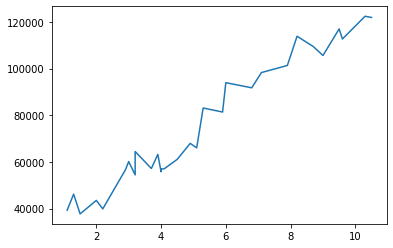

In [40]:
display(wig_col)
plt.plot(dataset[str(wig_col.value)], dataset['Salary']);


In [41]:
#3 classify dependent and independent variables
X = dataset.iloc[:,:-1].values  #independent variable YearsofExperience
y = dataset.iloc[:,-1].values  #dependent variable salary

print("\nIdependent Variable (Experience):\n\n", X[:5])
print("\nDependent Variable (Salary):\n\n", y[:5])


Idependent Variable (Experience):

 [[1.1]
 [1.3]
 [1.5]
 [2. ]
 [2.2]]

Dependent Variable (Salary):

 [39343. 46205. 37731. 43525. 39891.]


# Create Train and Test Sets

In [42]:
#4 Creating training set and testing set
from sklearn.model_selection import train_test_split

test_size = widgets.FloatSlider(min=0.01, max=0.6, value=0.2, description="Test Size :", tooltips=['Usually 20-30%'])

display(test_size)



FloatSlider(value=0.2, description='Test Size :', max=0.6, min=0.01)

In [43]:
#Divide the dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=test_size.value, random_state = 0) 


print(f"Shape of Training set is {X_train.shape}")
print(f"Shape of Testing set is {X_test.shape}")

Shape of Training set is (24, 1)
Shape of Testing set is (6, 1)


# Apply Linear Regression 

In [44]:
#5 import SLR library
from sklearn.linear_model import LinearRegression

# configure params for the model.
fit_int_wig = widgets.ToggleButtons(
                options=['TRUE', 'FALSE'],
                description='Fit Intercept :',
                disabled=False,
                style=style,
                tooltips=['whether to calculate the intercept for this model. If set to False,\
                          no intercept will be used in calculations.'])

display(fit_int_wig)

norm_wig = widgets.ToggleButtons(
                value='FALSE',
                options=['TRUE', 'FALSE'],
                description='Normalize :',
                disabled=False,
                tooltips=['This parameter is ignored when fit_intercept is set to False. \
                            If True, the regressors X will be normalized before regression by \
                            subtracting the mean and dividing by the l2-norm.'],
                style=style)

display(norm_wig)

njobs_wig = widgets.Dropdown(options=[('One', 1), ('Two', 2), ('Three', 3), ('All Cores', -1)], 
                             description="Number of CPU Cores = ", style=style)

display(njobs_wig)

ToggleButtons(description='Fit Intercept :', options=('TRUE', 'FALSE'), style=ToggleButtonsStyle(description_w…

ToggleButtons(description='Normalize :', index=1, options=('TRUE', 'FALSE'), style=ToggleButtonsStyle(descript…

Dropdown(description='Number of CPU Cores = ', options=(('One', 1), ('Two', 2), ('Three', 3), ('All Cores', -1…

# Predict and Evaluate the Model 

In [45]:
#6 Train the Regressor with training set
regressor = LinearRegression(fit_intercept=fit_int_wig.value, normalize=norm_wig.value,
                            n_jobs=njobs_wig.value)

#fit the linear model
regressor.fit(X_train, y_train)

#7 predict the outcome of test sets
y_Pred = regressor.predict(X_test)
print("\nPredictions = ", y_Pred)


Predictions =  [ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


In [46]:
#8 Claculating the Accuracy of the predictions
from sklearn import metrics
print("Prediction Accuracy = ", metrics.r2_score(y_test, y_Pred))

#9 Comparing Actual and Predicted Salaries for he test set
print("\nActual vs Predicted Salaries \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_Pred,
                         "Abs. Error" : np.abs(y_test - y_Pred)})

error_df

Prediction Accuracy =  0.988169515729126

Actual vs Predicted Salaries 
------------------------------



,Actual,Predicted,Abs. Error
0,37731.0,40748.961841,3017.961841
1,122391.0,122699.622956,308.622956
2,57081.0,64961.657170,7880.657170
3,63218.0,63099.142145,118.857855
4,116969.0,115249.562855,1719.437145
5,109431.0,107799.502753,1631.497247


# Actual vs. Predicted 

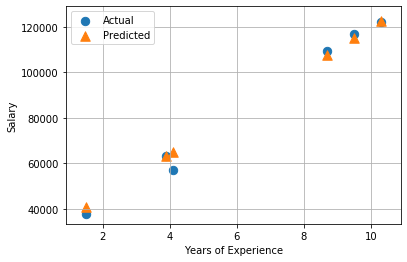

In [47]:
#Plotting Actual observation vs Predictions
plt.scatter(X_test,y_test, s = 70, label='Actual')
plt.scatter(X_test,y_Pred, s = 90, marker = '^', label='Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend();
plt.grid();
plt.show();
